# Project CCHAIN data pre-processing

## import relevant packages

In [1]:
import pandas as pd
import os
import time

from IPython.display import clear_output
start = time.time()

## check for dataset

In [2]:
data_folder = "CCHAIN_database"
local_directory = os.getcwd()

if data_folder not in os.listdir(local_directory):
    print(data_folder, os.listdir(local_directory))
    raise Exception("CCHAIN_database folder not found, please create it first.")
    
filename_list = os.listdir(local_directory+"\\"+data_folder)
if 'brgy_geography.csv' not in filename_list:
    raise Exception("Project CCHAIN files not found, please download and unpack the dataset into the /CCHAIN_database folder first")
    
if 'prepared_data' in os.listdir(local_directory):
    confirm = input("prepared_data folder already exists, are you sure you want to rerun the data preparation?\nif you continue, this will take ~20 minutes \nY/N:")
    if confirm != 'Y':
        raise SystemExit("Cancelling runtime!")

prepared_data folder already exists, are you sure you want to rerun the data preparation?
if you continue, this will take ~20 minutes 
Y/N:Y


## load all the tables

In [3]:
df_name_list = []

for i, filename in enumerate(filename_list):
    clear_output(wait=True)
    
    print(f"Files read/Total files: {i}/{len(filename_list)}")
    df_name = filename.split('.')[0].lower()
    df_name_list += df_name
    print(f"Reading: {filename}")
    df = pd.read_csv(local_directory+"\\"+data_folder+"\\"+filename)
    globals()[df_name] = df

Files read/Total files: 29/30
Reading: worldpop_population.csv


## create the base barangay dataframe

In [4]:
picked_cities = ['City of Mandaluyong','City of Navotas','City of Muntinlupa']

brgy = location[['adm3_en','adm3_pcode','adm4_en','adm4_pcode']]
base_barangay_df = pd.merge(brgy.assign(key=1), calendar.assign(key=1), on='key').drop('key', axis=1)
base_barangay_df = base_barangay_df.drop(base_barangay_df[~base_barangay_df.adm3_en.isin(picked_cities)].index)
base_barangay_df

,adm3_en,adm3_pcode,adm4_en,adm4_pcode,date
927735,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-01
927736,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-02
927737,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-03
927738,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-04
927739,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-05
...,...,...,...,...,...
6421090,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-27
6421091,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-28
6421092,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-29
6421093,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-30


## append climate data to barangay dataframe

In [5]:
df_with_climate_data = pd.merge(base_barangay_df, climate_atmosphere, on=['adm4_pcode','date'])
df_with_climate_data = df_with_climate_data.drop(['freq', 'uuid'], axis = 1)
df_with_climate_data

,adm3_en,adm3_pcode,adm4_en,adm4_pcode,date,tave,tmin,tmax,heat_index,pr,wind_speed,rh,solar_rad,uv_rad
0,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-01,27.40,25.33,30.59,29.45,0.0,5.03,71.26,199.32,23.89
1,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-02,26.39,24.69,29.41,27.52,0.0,6.13,70.34,214.67,24.67
2,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-03,26.54,24.08,30.29,27.62,0.0,3.70,66.81,221.31,24.98
3,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-04,26.52,24.38,29.97,27.79,0.0,5.93,69.28,205.95,24.69
4,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-05,25.85,24.09,28.61,26.99,5.9,6.20,74.02,197.95,23.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365245,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-27,24.60,23.30,26.59,25.10,0.0,2.81,70.32,120.84,14.76
365246,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-28,25.51,23.39,28.17,26.40,0.0,2.55,70.91,134.82,16.43
365247,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-29,25.59,23.73,28.51,26.76,0.0,1.80,74.08,59.58,7.38
365248,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-30,26.70,24.73,29.70,28.24,0.0,0.78,72.41,139.43,17.06


## append osm_poi_health data to barangay dataframe

In [6]:
df_with_climate_data['date'] = pd.to_datetime(df_with_climate_data['date'])
df_with_climate_data['year'] = df_with_climate_data['date'].dt.year
df_barangay_health_poi = osm_poi_health
df_barangay_health_poi['date'] = pd.to_datetime(df_barangay_health_poi['date'])
df_barangay_health_poi['year'] = df_barangay_health_poi['date'].dt.year
df_barangay_health_poi = df_barangay_health_poi.drop(['date'],axis=1)

df = pd.merge(df_with_climate_data, right=df_barangay_health_poi, on=["year","adm4_pcode"], how="left").drop(['freq','uuid','year'],axis=1)
df

,adm3_en,adm3_pcode,adm4_en,adm4_pcode,date,tave,tmin,tmax,heat_index,pr,...,dentist_count,dentist_nearest,doctors_count,doctors_nearest,hospital_count,hospital_nearest,optician_count,optician_nearest,pharmacy_count,pharmacy_nearest
0,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-01,27.40,25.33,30.59,29.45,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-02,26.39,24.69,29.41,27.52,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-03,26.54,24.08,30.29,27.62,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-04,26.52,24.38,29.97,27.79,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-05,25.85,24.09,28.61,26.99,5.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365245,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-27,24.60,23.30,26.59,25.10,0.0,...,0.0,10000.0,0.0,10000.0,0.0,1207.888966,0.0,10000.0,0.0,39.683336
365246,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-28,25.51,23.39,28.17,26.40,0.0,...,0.0,10000.0,0.0,10000.0,0.0,1207.888966,0.0,10000.0,0.0,39.683336
365247,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-29,25.59,23.73,28.51,26.76,0.0,...,0.0,10000.0,0.0,10000.0,0.0,1207.888966,0.0,10000.0,0.0,39.683336
365248,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-30,26.70,24.73,29.70,28.24,0.0,...,0.0,10000.0,0.0,10000.0,0.0,1207.888966,0.0,10000.0,0.0,39.683336


## append population data to barangay dataframe

In [7]:
df_barangay_population = worldpop_population
df_barangay_population['date'] = pd.to_datetime(df_barangay_population['date'])
df_barangay_population['year'] = df_barangay_population['date'].dt.year

df['year'] = df['date'].dt.year

df = pd.merge(df, right=df_barangay_population[['year','adm4_pcode','pop_count_total','pop_density_mean']], on=['adm4_pcode','year'], how='left')
df

,adm3_en,adm3_pcode,adm4_en,adm4_pcode,date,tave,tmin,tmax,heat_index,pr,...,doctors_nearest,hospital_count,hospital_nearest,optician_count,optician_nearest,pharmacy_count,pharmacy_nearest,year,pop_count_total,pop_density_mean
0,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-01,27.40,25.33,30.59,29.45,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003,10518.894531,2543.836914
1,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-02,26.39,24.69,29.41,27.52,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003,10518.894531,2543.836914
2,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-03,26.54,24.08,30.29,27.62,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003,10518.894531,2543.836914
3,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-04,26.52,24.38,29.97,27.79,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003,10518.894531,2543.836914
4,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-05,25.85,24.09,28.61,26.99,5.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003,10518.894531,2543.836914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365245,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-27,24.60,23.30,26.59,25.10,0.0,...,10000.0,0.0,1207.888966,0.0,10000.0,0.0,39.683336,2022,NaN,NaN
365246,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-28,25.51,23.39,28.17,26.40,0.0,...,10000.0,0.0,1207.888966,0.0,10000.0,0.0,39.683336,2022,NaN,NaN
365247,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-29,25.59,23.73,28.51,26.76,0.0,...,10000.0,0.0,1207.888966,0.0,10000.0,0.0,39.683336,2022,NaN,NaN
365248,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-30,26.70,24.73,29.70,28.24,0.0,...,10000.0,0.0,1207.888966,0.0,10000.0,0.0,39.683336,2022,NaN,NaN


## append barangay geographical data to barangay dataframe

In [8]:
df = pd.merge(df, right=brgy_geography[['brgy_total_area', 'adm4_pcode']], on=["adm4_pcode"], how='left')
df

,adm3_en,adm3_pcode,adm4_en,adm4_pcode,date,tave,tmin,tmax,heat_index,pr,...,hospital_count,hospital_nearest,optician_count,optician_nearest,pharmacy_count,pharmacy_nearest,year,pop_count_total,pop_density_mean,brgy_total_area
0,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-01,27.40,25.33,30.59,29.45,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2003,10518.894531,2543.836914,2.8749
1,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-02,26.39,24.69,29.41,27.52,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2003,10518.894531,2543.836914,2.8749
2,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-03,26.54,24.08,30.29,27.62,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2003,10518.894531,2543.836914,2.8749
3,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-04,26.52,24.38,29.97,27.79,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2003,10518.894531,2543.836914,2.8749
4,City of Mandaluyong,PH137401000,Wack-wack Greenhills,PH137401027,2003-01-05,25.85,24.09,28.61,26.99,5.9,...,NaN,NaN,NaN,NaN,NaN,NaN,2003,10518.894531,2543.836914,2.8749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365245,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-27,24.60,23.30,26.59,25.10,0.0,...,0.0,1207.888966,0.0,10000.0,0.0,39.683336,2022,NaN,NaN,0.2661
365246,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-28,25.51,23.39,28.17,26.40,0.0,...,0.0,1207.888966,0.0,10000.0,0.0,39.683336,2022,NaN,NaN,0.2661
365247,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-29,25.59,23.73,28.51,26.76,0.0,...,0.0,1207.888966,0.0,10000.0,0.0,39.683336,2022,NaN,NaN,0.2661
365248,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-30,26.70,24.73,29.70,28.24,0.0,...,0.0,1207.888966,0.0,10000.0,0.0,39.683336,2022,NaN,NaN,0.2661


## convert barangay dataframe from 'daily' to 'monthly'

In [9]:
import datetime

df['month'] = df['date'].apply(lambda x: x.month)
df['week'] = df['date'].apply(lambda x: x.isocalendar().week)
df['year'] = df['date'].apply(lambda x: x.year)

In [10]:
df.tail(5)

,adm3_en,adm3_pcode,adm4_en,adm4_pcode,date,tave,tmin,tmax,heat_index,pr,...,optician_count,optician_nearest,pharmacy_count,pharmacy_nearest,year,pop_count_total,pop_density_mean,brgy_total_area,month,week
365245,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-27,24.60,23.30,26.59,25.10,0.0,...,0.0,10000.0,0.0,39.683336,2022,NaN,NaN,0.2661,12,52
365246,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-28,25.51,23.39,28.17,26.40,0.0,...,0.0,10000.0,0.0,39.683336,2022,NaN,NaN,0.2661,12,52
365247,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-29,25.59,23.73,28.51,26.76,0.0,...,0.0,10000.0,0.0,39.683336,2022,NaN,NaN,0.2661,12,52
365248,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-30,26.70,24.73,29.70,28.24,0.0,...,0.0,10000.0,0.0,39.683336,2022,NaN,NaN,0.2661,12,52
365249,City of Navotas,PH137503000,"North Bay Blvd., North",PH137503008,2022-12-31,26.47,25.06,28.53,28.24,0.0,...,0.0,10000.0,0.0,39.683336,2022,NaN,NaN,0.2661,12,52


In [11]:
import numpy as np
import time

static_columns = [
    'adm3_en',
    'adm3_pcode',
    'adm4_en',
    'adm4_pcode',
]
min_columns = [
    'date'
]
standard_average_columns = [
    'clinic_count',
    'dentist_count',
    'doctors_count',
    'hospital_count',
    'optician_count',
    'pharmacy_count',
    'clinic_nearest',
    'dentist_nearest',
    'doctors_nearest',
    'hospital_nearest',
    'optician_nearest',
    'pharmacy_nearest',
    'pop_count_total',
    'pop_density_mean',
]
weighted_average_columns = [
    'tave',
    'tmin',
    'tmax', 
    'heat_index',
    'pr',
    'wind_speed',
    'rh',
    'solar_rad',
    'uv_rad',
]

dfs_to_merge = []
by = ['year','week','month','adm3_pcode']
df.fillna(0)

def group_weighted_averages(df, weights, values, by):
    return df.groupby(by, dropna=False).apply(lambda x: np.average(x[values],weights=x[weights]))

def group_standard_averages(df, values, by):
    return df.groupby(by, dropna=False)[values].mean()

for i, column in enumerate(weighted_average_columns):
    print(f"grouping {column} from df")
    dfs_to_merge.append(group_weighted_averages(df, weights='brgy_total_area', values=column, by=by))
    clear_output(wait=True)
    
for i, column in enumerate(standard_average_columns):
    print(f"grouping {column} from df")
    dfs_to_merge.append(group_standard_averages(df, values=column, by=by))
    clear_output(wait=True)
    
clear_output(wait=True)
print("done!")
merged_df = pd.concat(dfs_to_merge, axis = 1, keys = weighted_average_columns+standard_average_columns).reset_index()

done!


In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              3750 non-null   int64  
 1   week              3750 non-null   int64  
 2   month             3750 non-null   int64  
 3   adm3_pcode        3750 non-null   object 
 4   tave              3750 non-null   float64
 5   tmin              3750 non-null   float64
 6   tmax              3750 non-null   float64
 7   heat_index        3750 non-null   float64
 8   pr                3750 non-null   float64
 9   wind_speed        3750 non-null   float64
 10  rh                3750 non-null   float64
 11  solar_rad         3750 non-null   float64
 12  uv_rad            3750 non-null   float64
 13  clinic_count      1686 non-null   float64
 14  dentist_count     1686 non-null   float64
 15  doctors_count     1686 non-null   float64
 16  hospital_count    1686 non-null   float64


## append disease_lgu_disaggregated_totals to df 

In [13]:
df = merged_df

df_disease = disease_pidsr_totals

df_disease['date'] = pd.to_datetime(df_disease['date'])
df_disease['month'] = df_disease['date'].apply(lambda x: x.month)
df_disease['week'] = df_disease['date'].apply(lambda x: x.isocalendar()[1])
df_disease['year'] = df_disease['date'].apply(lambda x: x.year)

df_disease = df_disease.drop(['uuid','freq','source_filename','source_name','disease_icd10_code','date'], axis=1)
df_disease = df_disease.groupby(by=['adm3_pcode','disease_common_name','week','year']).sum().reset_index()

cutoff_year = df_disease['year'].min()
df = df.drop(df[df['year'] < cutoff_year].index)

df_dict = {}
for disease in df_disease['disease_common_name'].unique():
    df_dict[disease] = pd.merge(df, 
                                right=df_disease[df_disease['disease_common_name']==disease], 
                                on=['year','month','week','adm3_pcode'], 
                                how='left')
    df_dict[disease] = df_dict[disease].drop('disease_common_name', axis=1)
df_dict.keys()

full_df = pd.merge(df, 
                    right=df_disease, 
                    on=['year','month','week','adm3_pcode'], 
                    how='left')

In [14]:
df_dict['DENGUE FEVER'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811 entries, 0 to 2810
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              2811 non-null   int64  
 1   week              2811 non-null   int64  
 2   month             2811 non-null   int64  
 3   adm3_pcode        2811 non-null   object 
 4   tave              2811 non-null   float64
 5   tmin              2811 non-null   float64
 6   tmax              2811 non-null   float64
 7   heat_index        2811 non-null   float64
 8   pr                2811 non-null   float64
 9   wind_speed        2811 non-null   float64
 10  rh                2811 non-null   float64
 11  solar_rad         2811 non-null   float64
 12  uv_rad            2811 non-null   float64
 13  clinic_count      1686 non-null   float64
 14  dentist_count     1686 non-null   float64
 15  doctors_count     1686 non-null   float64
 16  hospital_count    1686 non-null   float64


In [15]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19191 entries, 0 to 19190
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 19191 non-null  int64  
 1   week                 19191 non-null  int64  
 2   month                19191 non-null  int64  
 3   adm3_pcode           19191 non-null  object 
 4   tave                 19191 non-null  float64
 5   tmin                 19191 non-null  float64
 6   tmax                 19191 non-null  float64
 7   heat_index           19191 non-null  float64
 8   pr                   19191 non-null  float64
 9   wind_speed           19191 non-null  float64
 10  rh                   19191 non-null  float64
 11  solar_rad            19191 non-null  float64
 12  uv_rad               19191 non-null  float64
 13  clinic_count         12450 non-null  float64
 14  dentist_count        12450 non-null  float64
 15  doctors_count        12450 non-null 

## convert categorical to numerical values

In [16]:
'''df = pd.merge(df, right=df_disease, on=['year','month','adm3_pcode'], how='left')
df['sex'] = df['sex'].astype('category')
df['age_group'] = df['age_group'].astype('category')

cat_columns = df.select_dtypes(['category']).columns
cat_mappings = {}

for column in cat_columns:
    cat_mappings[column] = dict((original_cat, new_cat) for new_cat, original_cat in enumerate(df[column].cat.categories))
    print(f"{column} categorical mapping:")
    for i, category in enumerate(cat_mappings[column]):
        print(f"{i}:\t{category}")

for disease in df_dict.keys():
    disease_df = df_dict[disease]
    for column in cat_mappings.keys():
        disease_df[column] = disease_df[column].astype('category')
        disease_df[column] = disease_df[column].cat.rename_categories(cat_mappings[column])
    df_dict[disease] = disease_df
    
df_dict['TYPHOID FEVER'].sort_values('case_total')'''

'df = pd.merge(df, right=df_disease, on=[\'year\',\'month\',\'adm3_pcode\'], how=\'left\')\ndf[\'sex\'] = df[\'sex\'].astype(\'category\')\ndf[\'age_group\'] = df[\'age_group\'].astype(\'category\')\n\ncat_columns = df.select_dtypes([\'category\']).columns\ncat_mappings = {}\n\nfor column in cat_columns:\n    cat_mappings[column] = dict((original_cat, new_cat) for new_cat, original_cat in enumerate(df[column].cat.categories))\n    print(f"{column} categorical mapping:")\n    for i, category in enumerate(cat_mappings[column]):\n        print(f"{i}:\t{category}")\n\nfor disease in df_dict.keys():\n    disease_df = df_dict[disease]\n    for column in cat_mappings.keys():\n        disease_df[column] = disease_df[column].astype(\'category\')\n        disease_df[column] = disease_df[column].cat.rename_categories(cat_mappings[column])\n    df_dict[disease] = disease_df\n    \ndf_dict[\'TYPHOID FEVER\'].sort_values(\'case_total\')'

In [17]:
df_dict.keys()

dict_keys(['ACUTE BLOODY DIARRHEA', 'CHIKUNGUYA VIRAL DISEASE', 'CHOLERA', 'DENGUE FEVER', 'HEPATITIS A', 'LEPTOSPIROSIS', 'RABIES', 'ROTAVIRAL ENTERITIS', 'TYPHOID FEVER'])

# Quick EDA

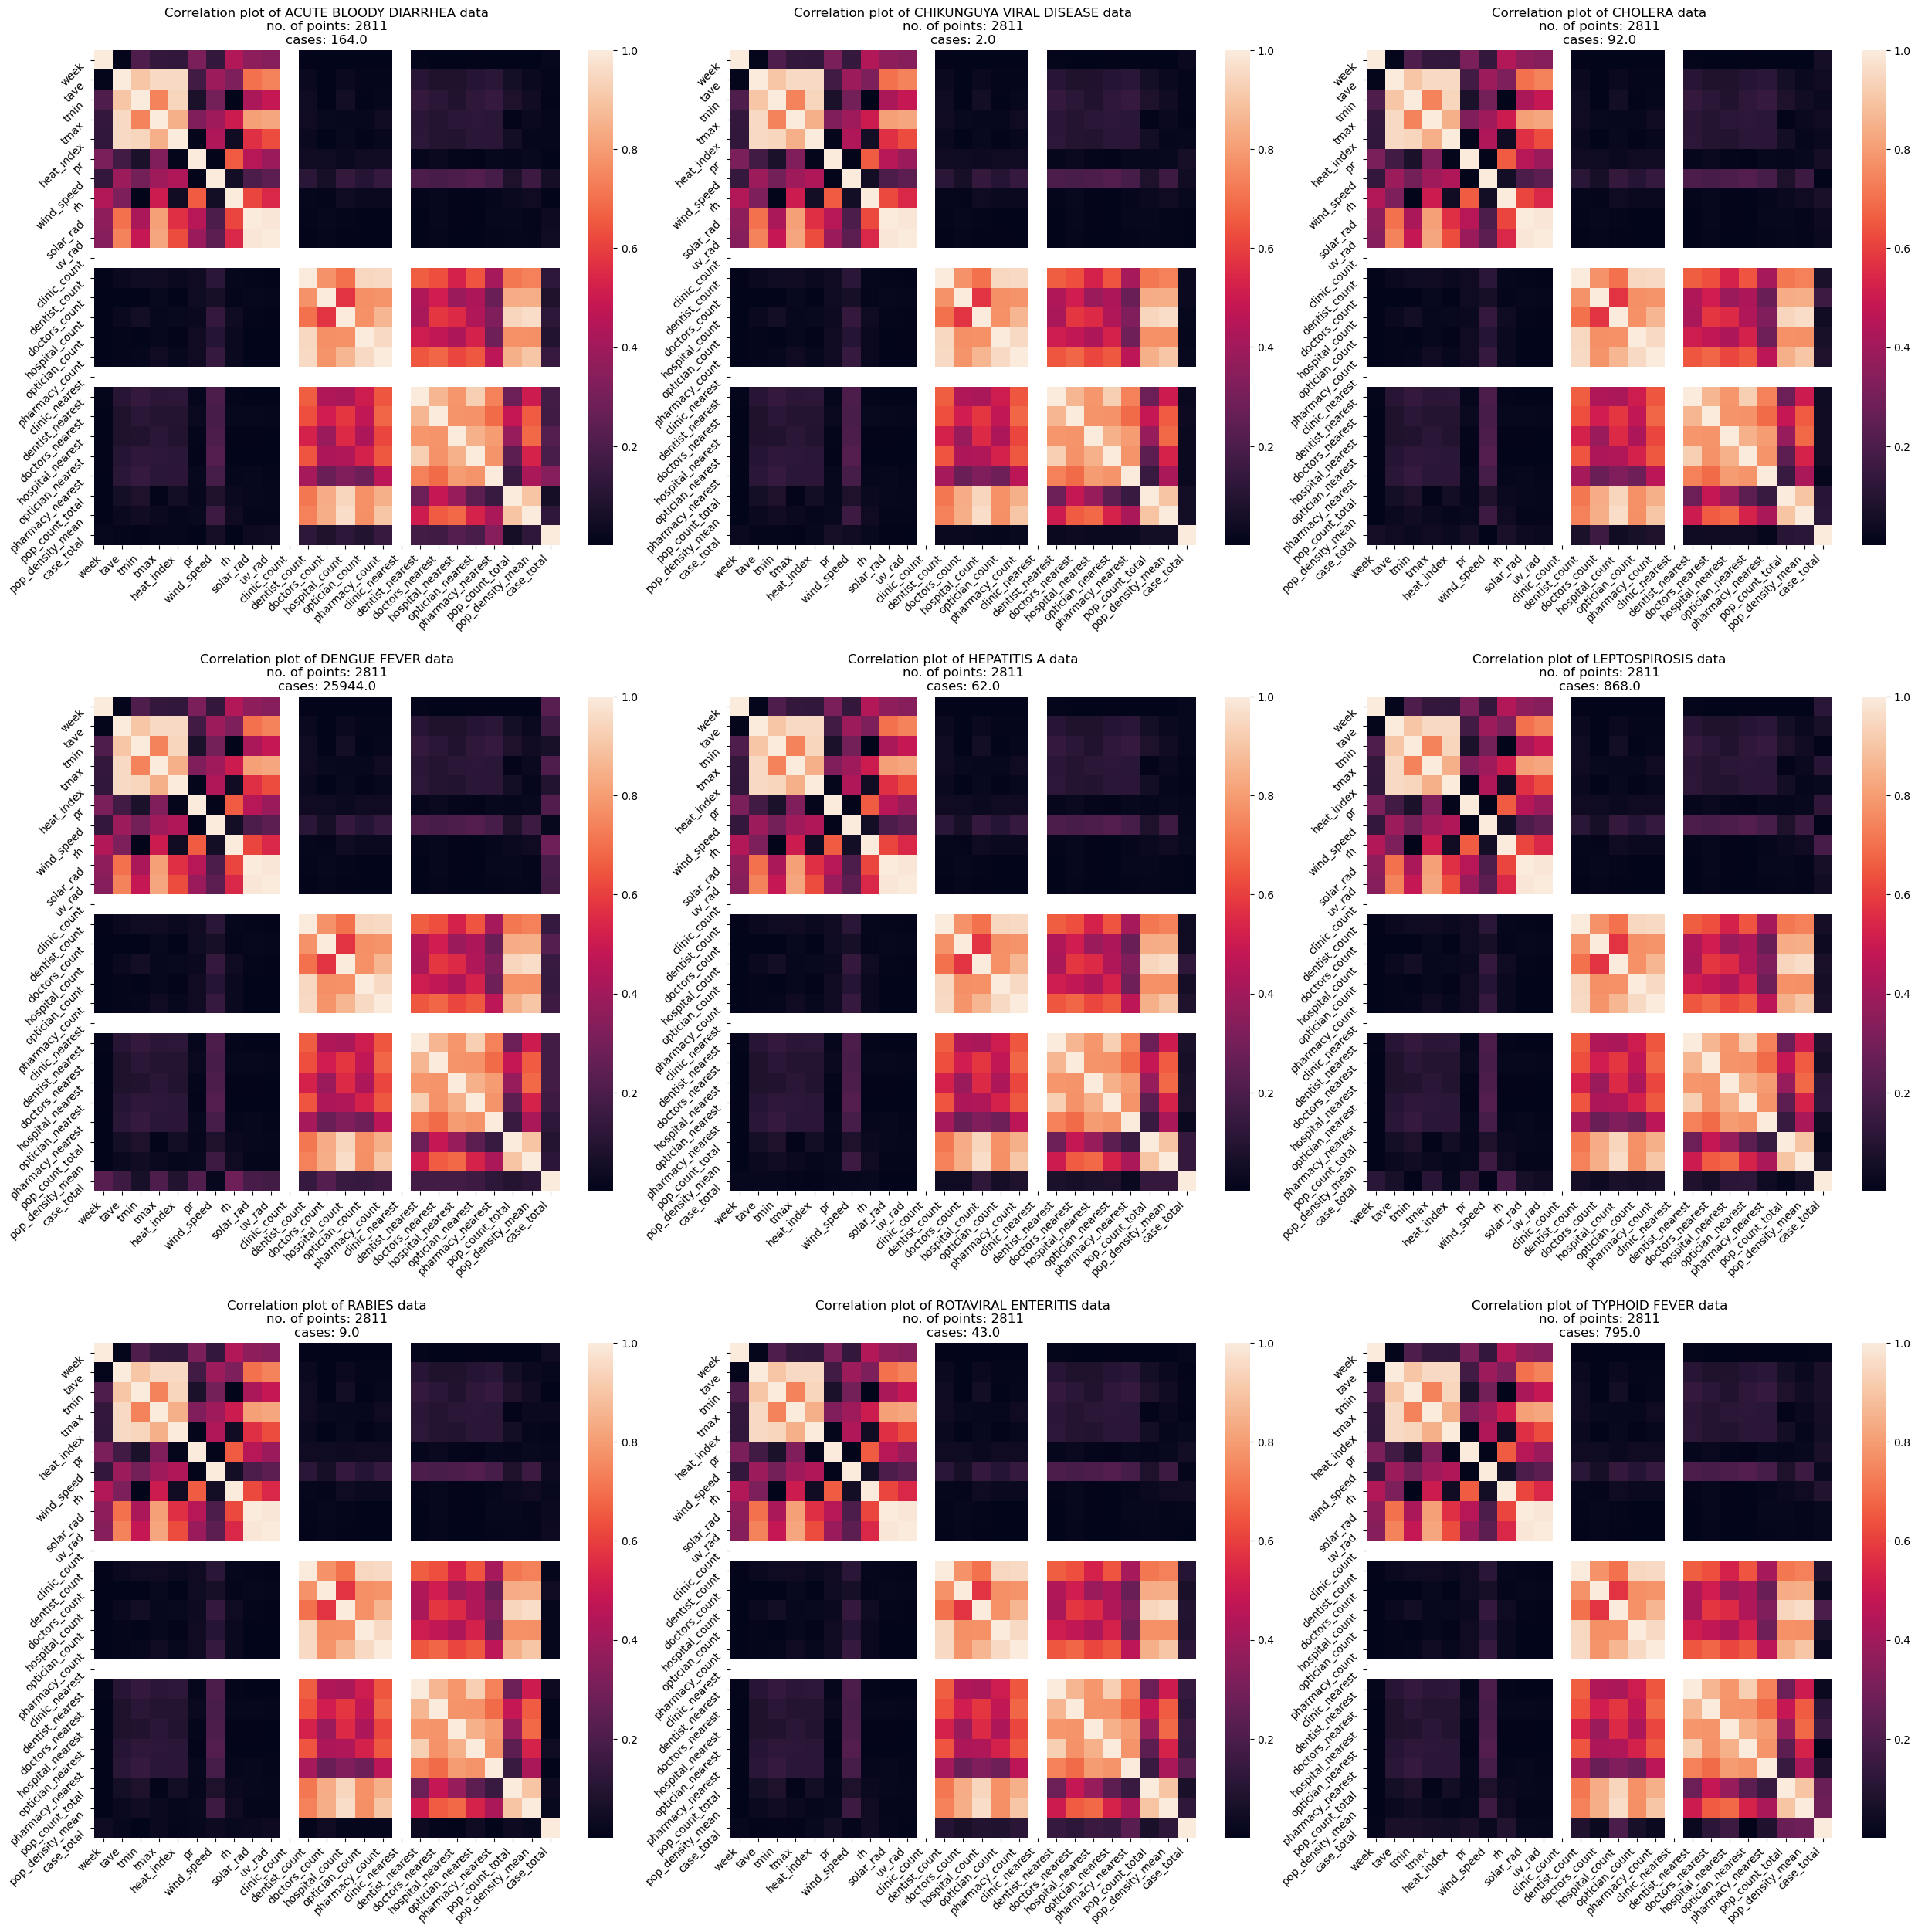

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

r = math.ceil(len(df_dict.keys())/3)
c = 3
fig, ax = plt.subplots(r, c, figsize=(25,8*r))
fig.tight_layout(pad = 2,h_pad=12)
disease_keys = list(df_dict.keys())

for x in range(r):
    for y in range(c):
        index = (y+x*3)
        if index > len(disease_keys):
            continue;
        disease = disease_keys[index]
        heatmap_data = df_dict[disease].drop(['year','month','adm3_pcode'],axis=1).corr()
        heatmap_data = heatmap_data.apply(lambda i: abs(i))
        sns.heatmap(heatmap_data, vmax=1, ax=ax[x, y])
        ax[x, y].set_xticks(ax[x, y].get_xticks(),rotation=45,labels=ax[x, y].get_xticklabels(),ha='right',va='top')
        ax[x, y].set_yticks(ax[x, y].get_yticks(),rotation=45,labels=ax[x, y].get_yticklabels(),ha='right',va='top')
        ax[x, y].set_title(f"Correlation plot of {disease} data\nno. of points: {len(df_dict[disease])}\ncases: {df_dict[disease]['case_total'].sum()}")
        ax[x, y].plot()

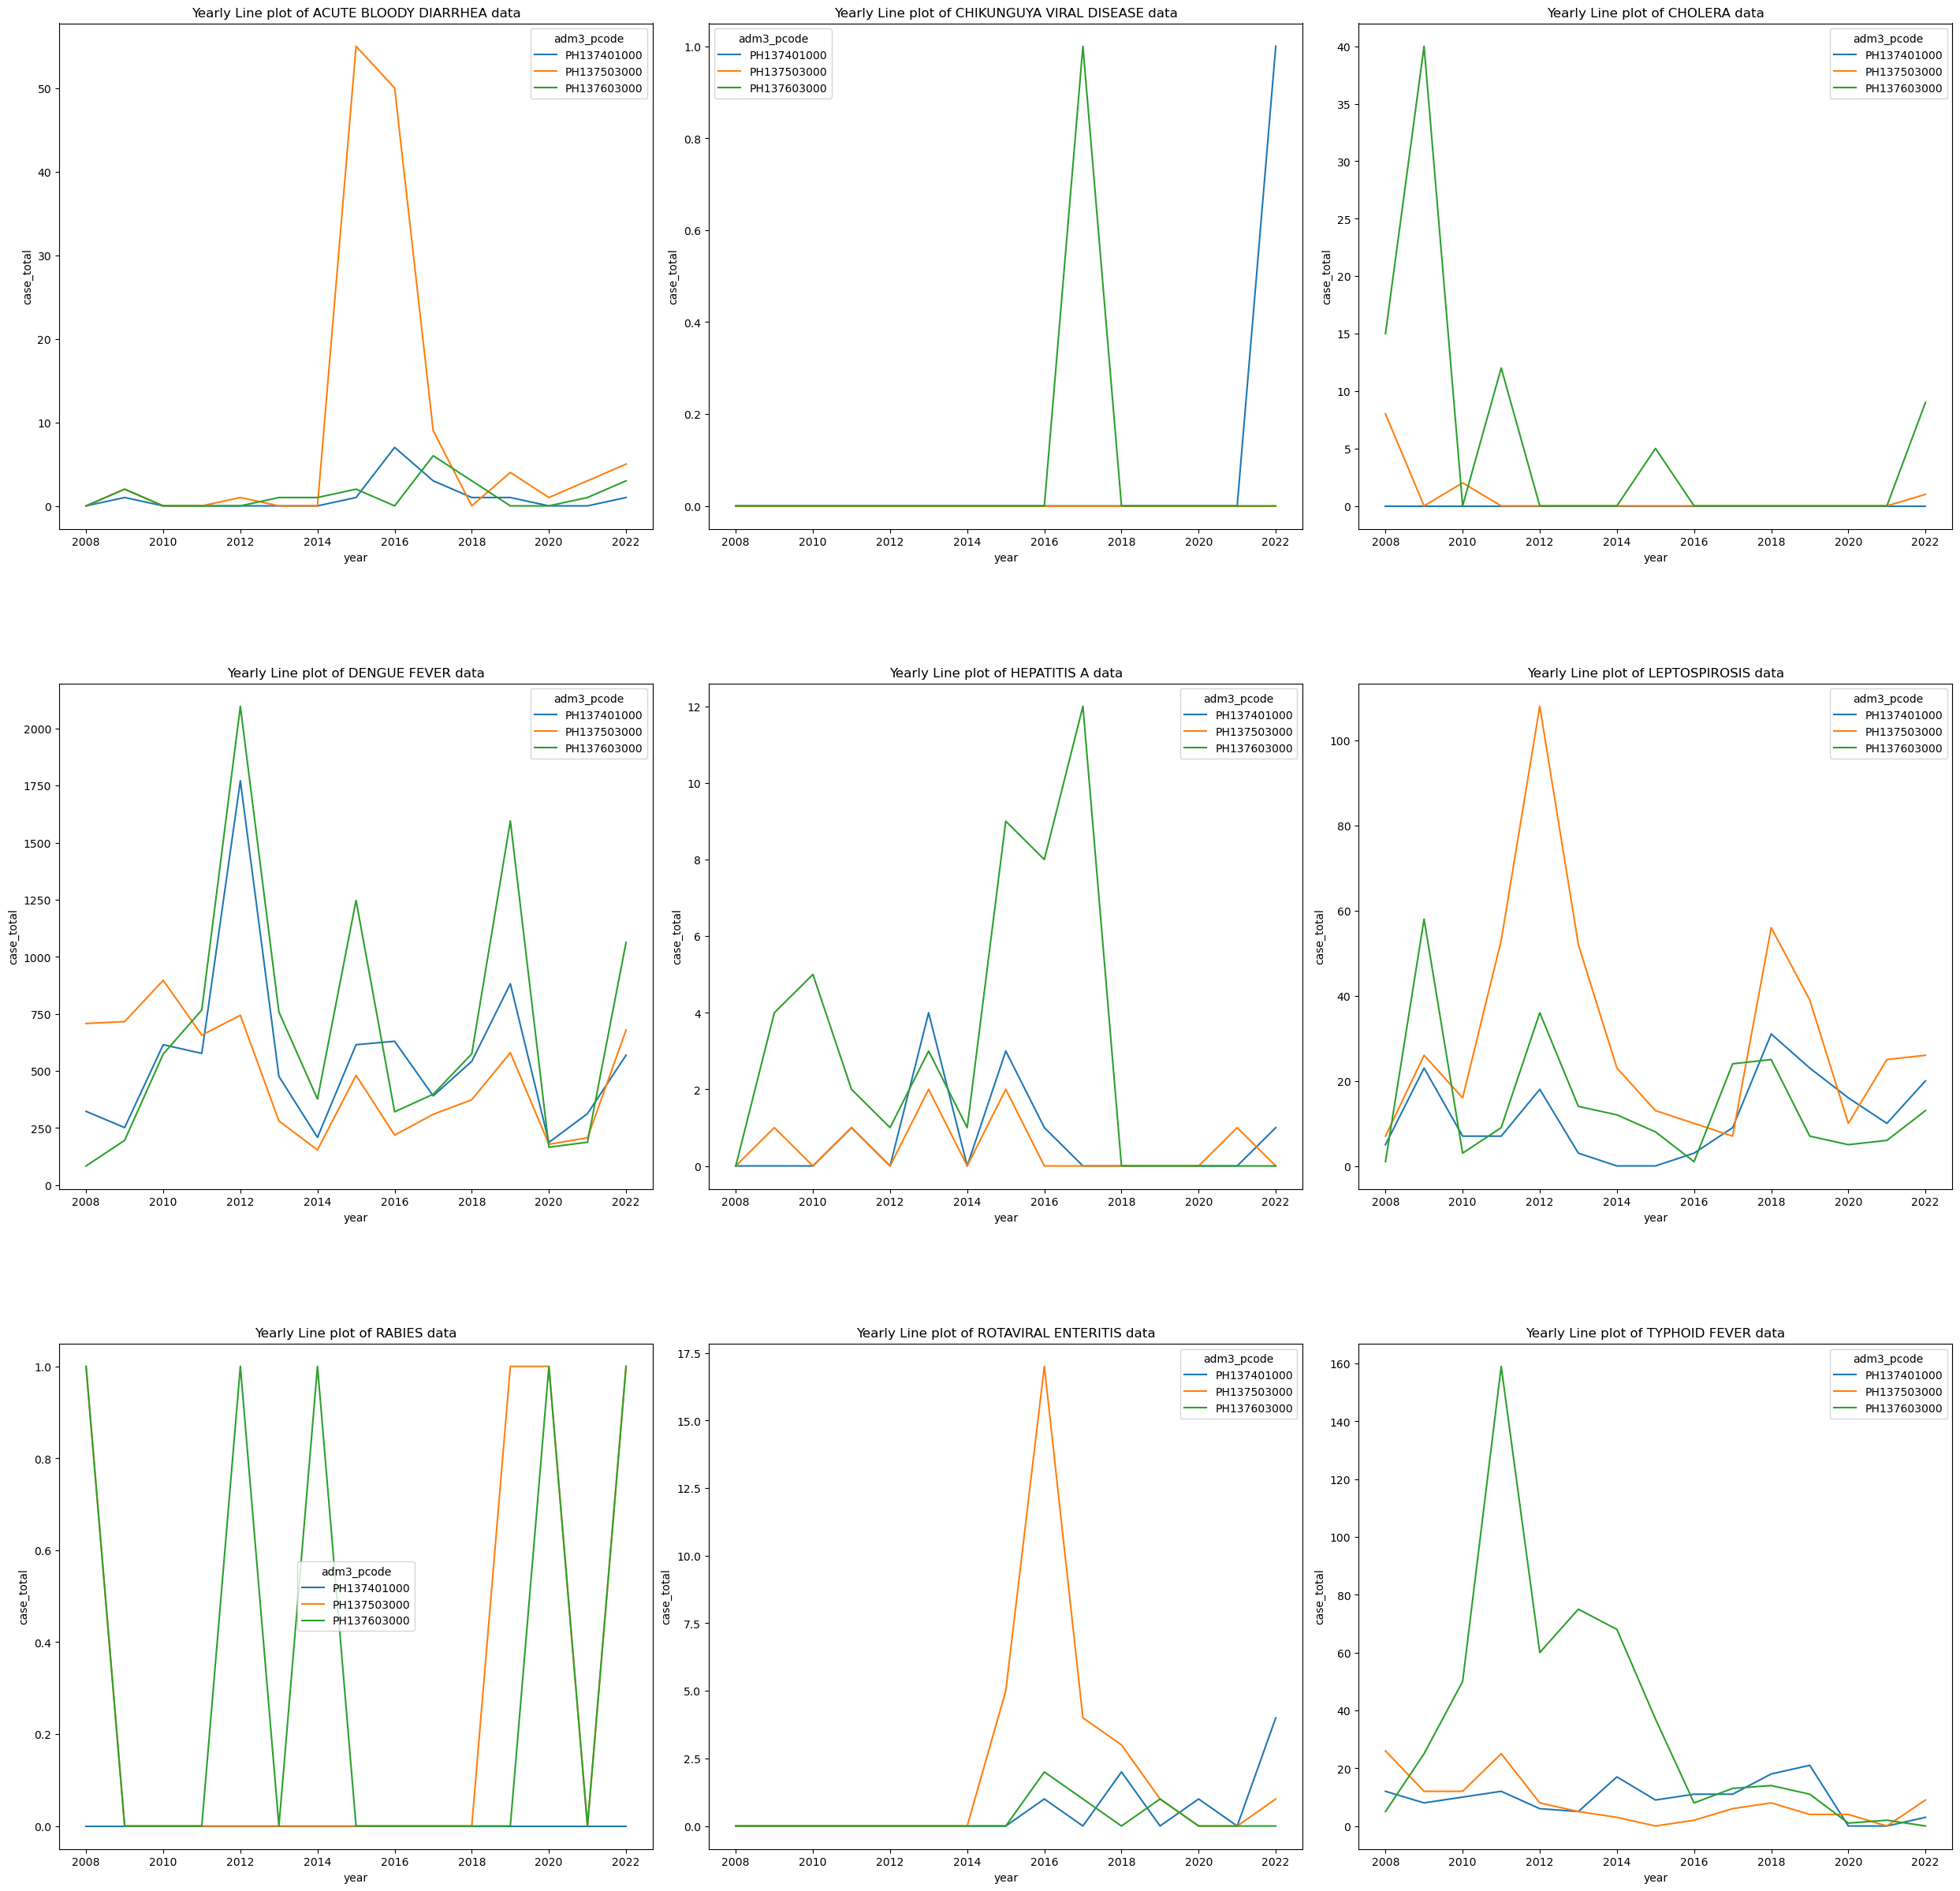

In [19]:
r = math.ceil(len(df_dict.keys())/3)
c = 3
fig, ax = plt.subplots(r, c, figsize=(25,8*r))
fig.tight_layout(pad = 2,h_pad=12)
disease_keys = list(df_dict.keys())

for x in range(r):
    for y in range(c):
        index = (y+x*3)
        if index > len(disease_keys):
            continue;
        disease = disease_keys[index]
        data = df_dict[disease]
        data = data.groupby(by=["year",'adm3_pcode']).sum().reset_index()

        sns.lineplot(data, x='year', y='case_total', hue='adm3_pcode', ax=ax[x, y])
        ax[x, y].set_title(f"Yearly Line plot of {disease} data")
        ax[x, y].plot()

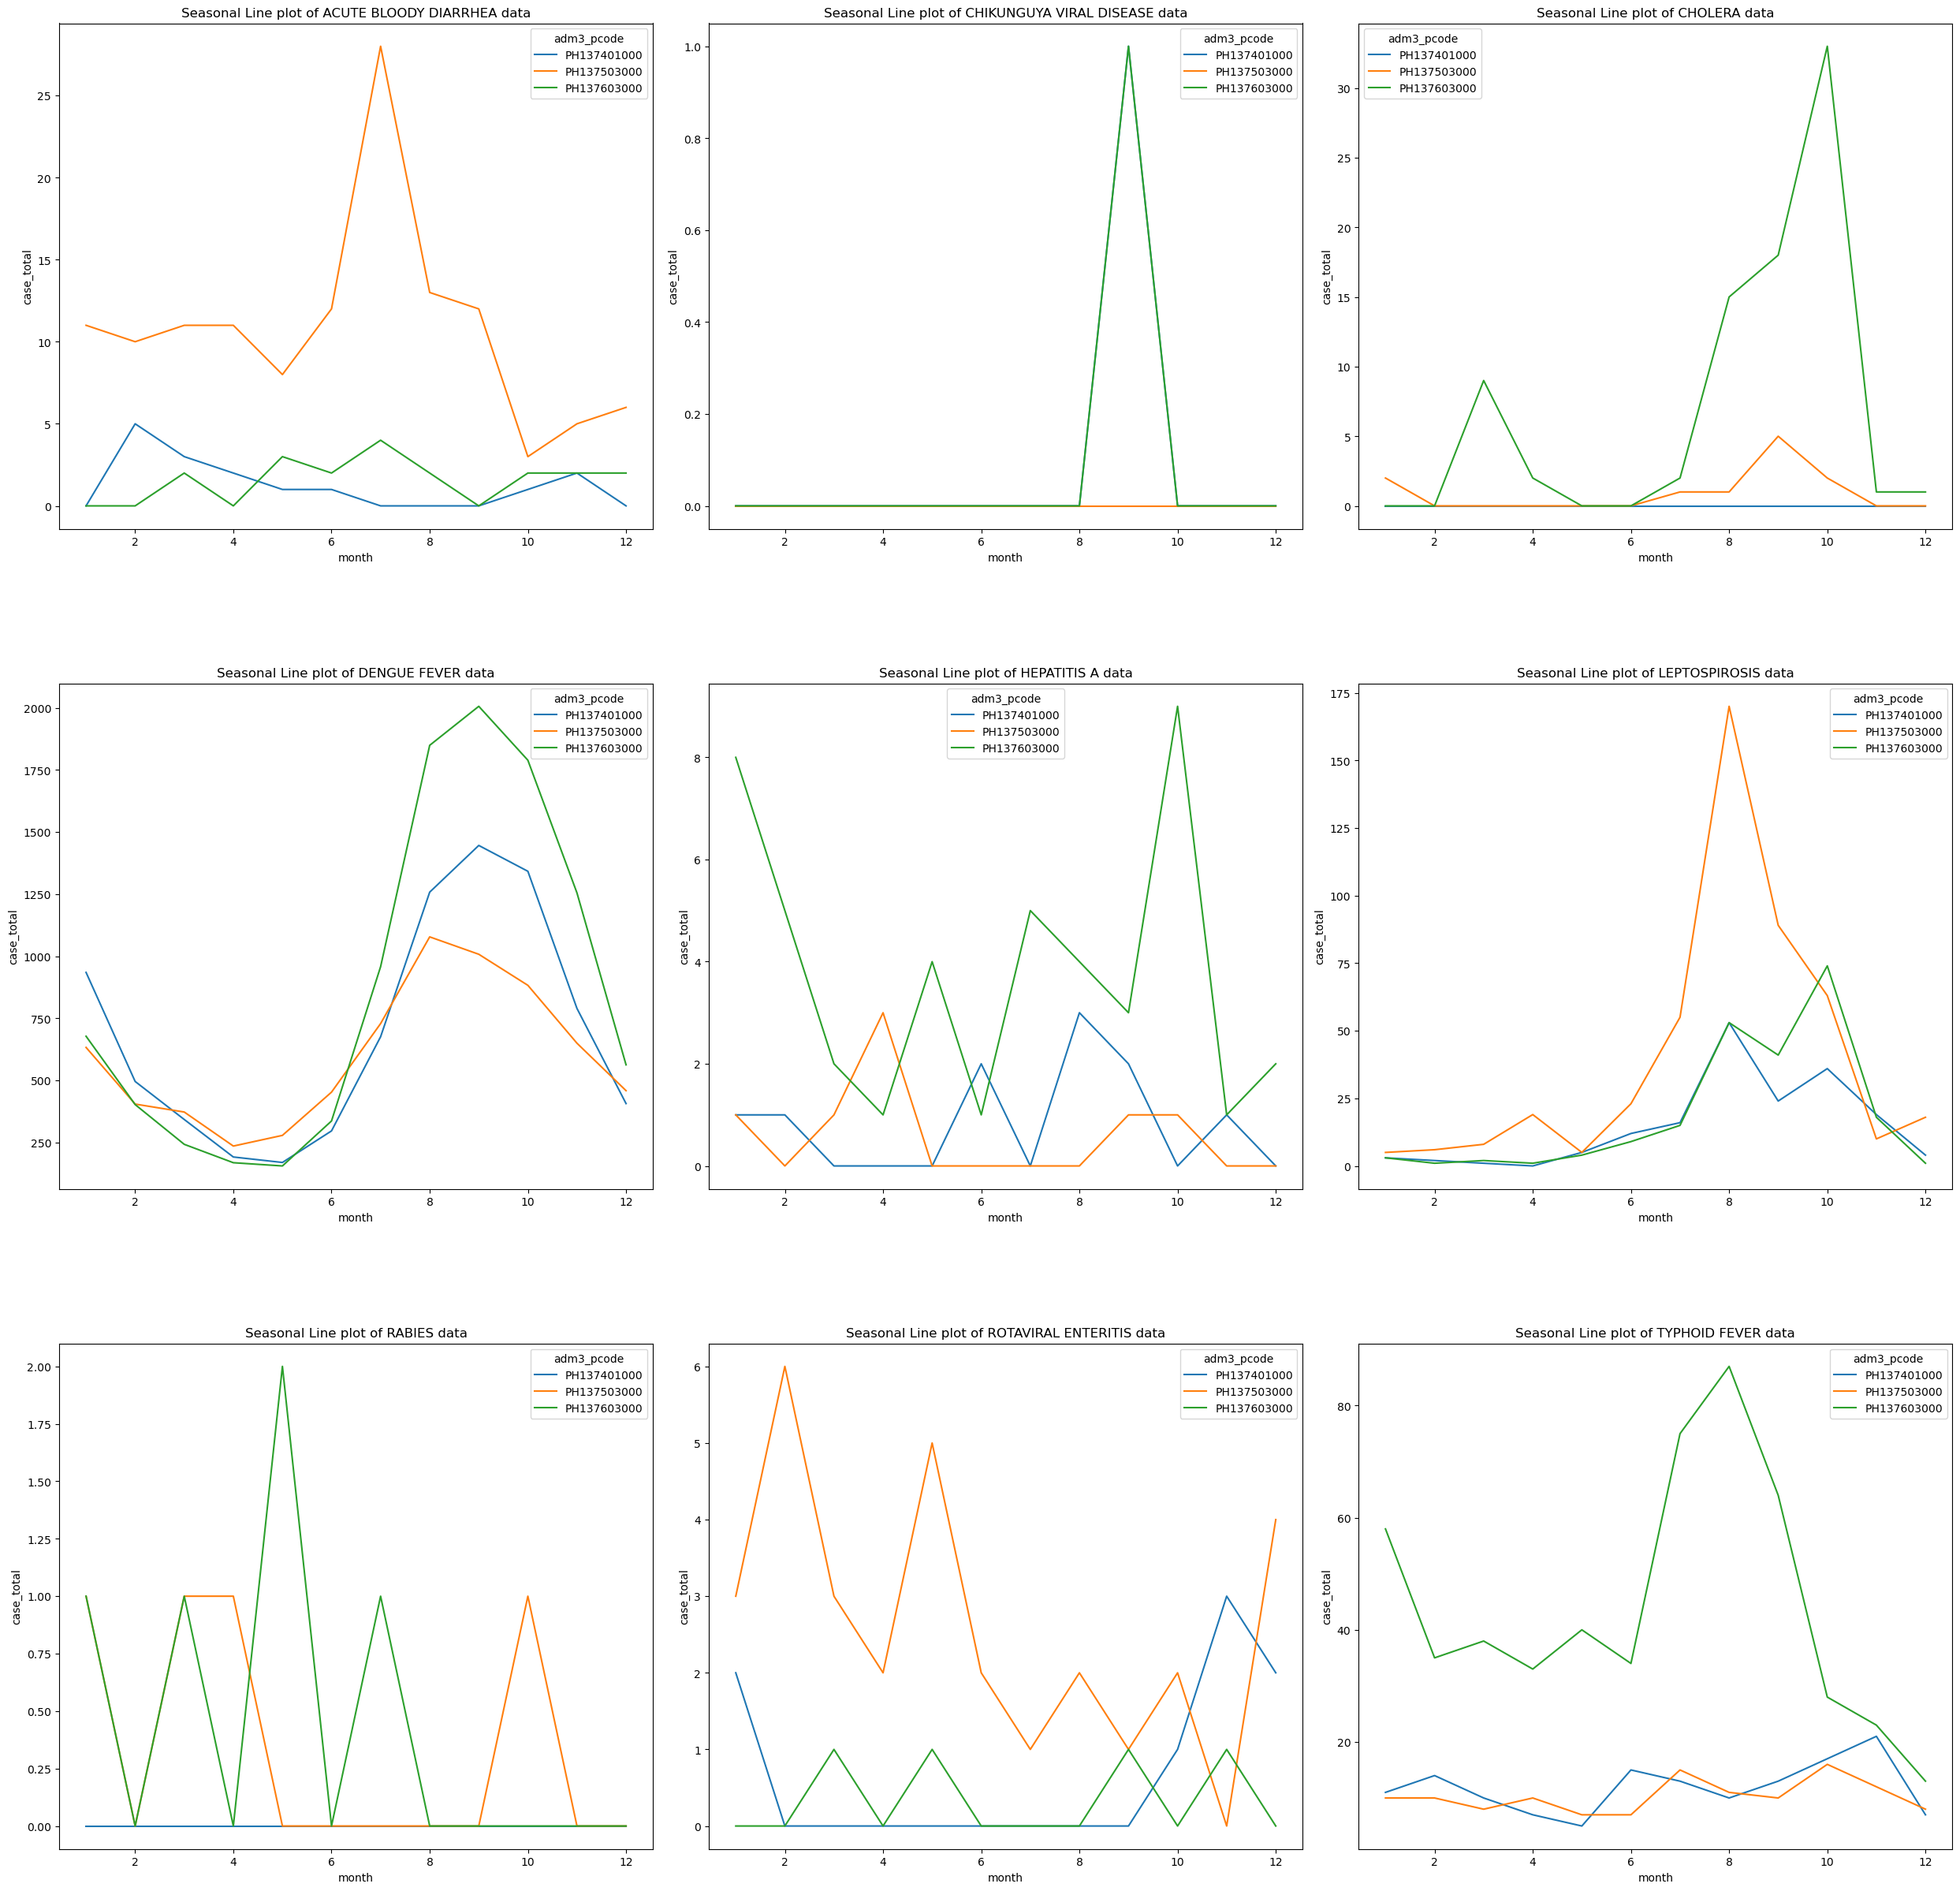

In [20]:
r = math.ceil(len(df_dict.keys())/3)
c = 3
fig, ax = plt.subplots(r, c, figsize=(25,8*r))
fig.tight_layout(pad = 2,h_pad=12)
disease_keys = list(df_dict.keys())

for x in range(r):
    for y in range(c):
        index = (y+x*3)
        if index > len(disease_keys):
            continue;
        disease = disease_keys[index]
        data = df_dict[disease]
        data = data.groupby(by=["month",'adm3_pcode']).sum().reset_index()

        sns.lineplot(data, x='month', y='case_total', hue='adm3_pcode', ax=ax[x, y])
        ax[x, y].set_title(f"Seasonal Line plot of {disease} data")
        ax[x, y].plot()

# save data into /prepared_data folder for use.

In [21]:
if 'prepared_data' not in os.listdir():
    os.mkdir('prepared_data')

for disease in df_dict.keys():
    df_dict[disease].to_csv(f'{local_directory}/prepared_data/{disease}.csv')
    
full_df.to_csv(f'{local_directory}/prepared_data/merged_disease_data.csv')

In [22]:
stop = time.time()
print(f"Total execution time: {time.strftime('%H:%M:%S', time.gmtime(stop-start))}")

Total execution time: 00:01:19
